In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from run_nerf import config_parser

In [2]:
def plot_cameras(poses, scale=0.5):
    camera_centers = poses[:, :3, 3]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Cartesian axes
    ax.quiver(0, 0, 0, 1, 0, 0, length=scale*2, color='r')
    ax.quiver(0, 0, 0, 0, 1, 0, length=scale*2,color='g')
    ax.quiver(0, 0, 0, 0, 0, 1, length=scale*2,color='b')
    ax.text(0, 0, 0, 'w')

    for i, T_c_0 in enumerate(poses):
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 0], T_c_0[1, 0], T_c_0[2, 0], length=scale, color='r')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 1], T_c_0[1, 1], T_c_0[2, 1], length=scale, color='g')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 2], T_c_0[1, 2], T_c_0[2, 2], length=scale, color='b')
        ax.text(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], str(i))

    axis_min_lim = np.min(camera_centers)
    axis_max_lim = np.max(camera_centers)
    ax.set_xlim([axis_min_lim, axis_max_lim])
    ax.set_ylim([axis_min_lim, axis_max_lim])
    ax.set_zlim([axis_min_lim, axis_max_lim])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

NeRF llff

In [3]:
parser = config_parser()
args = parser.parse_args(["--config", "configs/fern.txt"])

In [4]:
from load_llff import load_llff_data

# Load data
if args.dataset_type == 'llff':
    images, poses, bds, render_poses, i_test = load_llff_data(args.datadir, args.factor,
                                                                recenter=True, bd_factor=.75,
                                                                spherify=args.spherify)
    hwf = poses[0,:3,-1]
    poses = poses[:,:3,:4]
    if not isinstance(i_test, list):
        i_test = [i_test]

    if args.llffhold > 0:
        # print('Auto LLFF holdout,', args.llffhold)
        i_test = np.arange(images.shape[0])[::args.llffhold]

    i_val = i_test
    i_train = np.array([i for i in np.arange(int(images.shape[0])) if
                    (i not in i_test and i not in i_val)])

    # print('DEFINING BOUNDS')
    if args.no_ndc:
        near = np.ndarray.min(bds) * .9
        far = np.ndarray.max(bds) * 1.
        
    else:
        near = 0.
        far = 1.
    # print('NEAR FAR', near, far)

    print('Loaded llff')
    print("images", images.shape)
    print("poses", poses.shape)
    print("render_poses", render_poses.shape)
    print("hwf", hwf)
    print("datadir", args.datadir)
    print('Train val test sizes', len(i_train), len(i_val), len(i_test))
    print('Near far', near, far)

Loaded llff
images (20, 378, 504, 3)
poses (20, 3, 4)
render_poses (120, 3, 5)
hwf [378.     504.     407.5658]
datadir ./data/nerf_llff_data/fern
Train val test sizes 17 3 3
Near far 0.0 1.0


In [5]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print(poses[idx])
    plt.imshow(images[idx])

interactive(children=(IntSlider(value=9, description='idx', max=19), Output()), _dom_classes=('widget-interact…

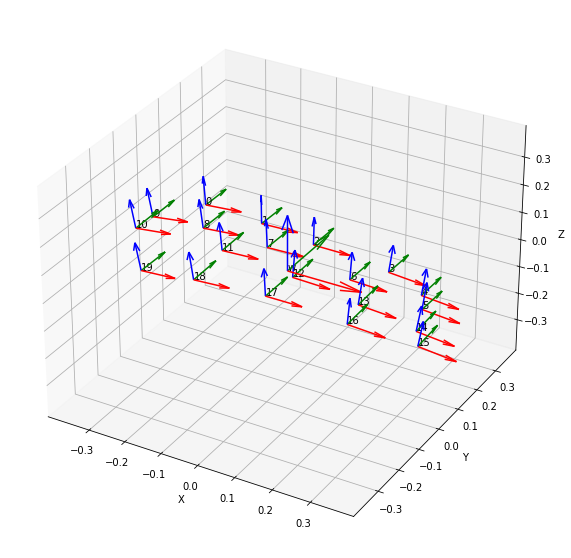

In [6]:
plot_cameras(poses, scale=0.1)

NeRF Synthetic

In [6]:
parser = config_parser()
args = parser.parse_args(["--config", "configs/lego.txt"])

In [7]:
from load_blender import load_blender_data

# Load data
if args.dataset_type == 'blender':
    images, poses, render_poses, hwf, i_split = load_blender_data(args.datadir, args.half_res, args.testskip)
    i_train, i_val, i_test = i_split

    near = 2.
    far = 6.

    if args.white_bkgd:
        images = images[...,:3]*images[...,-1:] + (1.-images[...,-1:])
    else:
        images = images[...,:3]
    
    print('Loaded blender')
    print("images", images.shape)
    print("poses", poses.shape)
    print("render_poses", render_poses.shape)
    print("hwf", hwf)
    print("datadir", args.datadir)
    print('Train val test sizes', len(i_train), len(i_val), len(i_test))
    print('Near far', near, far)

Loaded blender
images (138, 400, 400, 3)
poses (138, 4, 4)
render_poses torch.Size([40, 4, 4])
hwf [400, 400, 555.5555155968841]
datadir ./data/nerf_synthetic/lego
Train val test sizes 100 13 25
Near far 2.0 6.0


In [8]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print(poses[idx])
    plt.imshow(images[idx])

interactive(children=(IntSlider(value=68, description='idx', max=137), Output()), _dom_classes=('widget-intera…

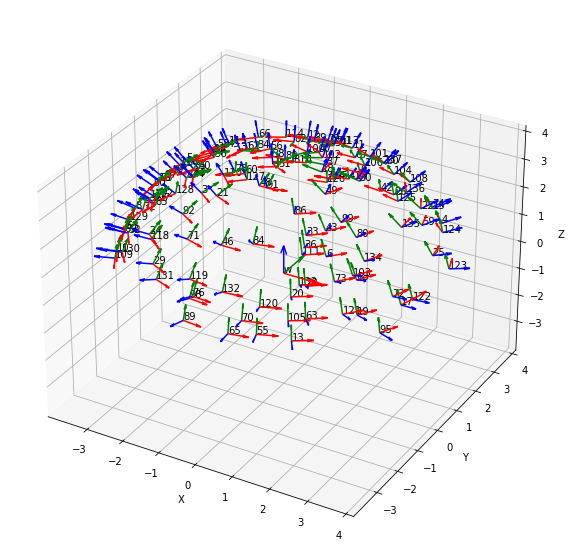

In [9]:
plot_cameras(poses, scale=0.5)

DTU

In [10]:
parser = config_parser()
args = parser.parse_args(["--config", "configs/dtu_scan65.txt"])

In [11]:
from load_dtu import load_dtu_data

# Load data
if args.dataset_type == 'dtu':
    images, poses, render_poses, hwf, i_split = load_dtu_data(args.datadir, args.half_res, args.testskip)
    i_train, i_val, i_test = i_split
    
    near = 0.
    far = 2.

    print('Loaded dtu')
    print("images", images.shape)
    print("poses", poses.shape)
    print("render_poses", render_poses.shape)
    print("hwf", hwf)
    print("datadir", args.datadir)
    print('Train val test sizes', len(i_train), len(i_val), len(i_test))
    print('Near far', near, far)

Loaded dtu
images (49, 1200, 1600, 3)
poses (49, 4, 4)
render_poses (10, 4, 4)
hwf [1200, 1600, 2892.330322265625]
datadir ./data/dtu/dtu_scan65
Train val test sizes 49 0 10
Near far 0.0 2.0


In [12]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print(poses[idx])
    plt.imshow(images[idx])

interactive(children=(IntSlider(value=24, description='idx', max=48), Output()), _dom_classes=('widget-interac…

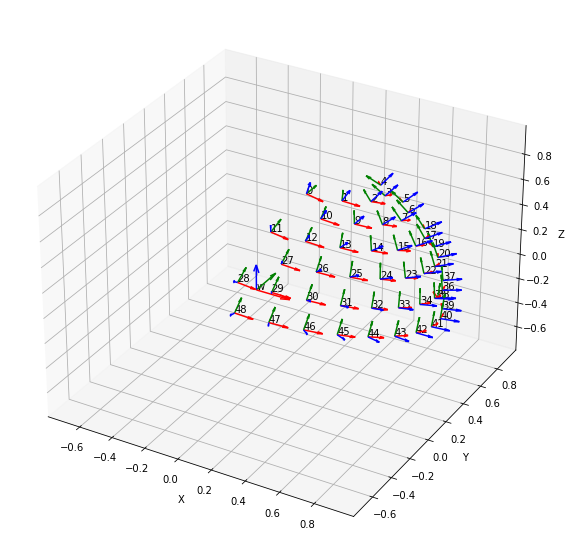

In [13]:
plot_cameras(poses, scale=0.1)